## Anomaly Temperature Detection in Windturbines

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introduction</font>

A wind power plant is composed of Wind Turbine Generators (WTGs), which include multiple mechanical components. Proper monitoring of these components is essential to prevent corrective maintenance and, consequently, production losses.

In this project, we focus on monitoring the temperature of key mechanical components using Machine Learning models to predict their normal behavior under standard operating conditions. These predictions are compared with real-time temperature measurements to detect normal or abnormal operating conditions.

The input variables were selected based on operational experience and their high influence on the internal mechanical component temperatures:

- Active Power
- Wind Direction
- Wind Speed
- Ambient Temperature
- Nacelle Temperature

The output variables correspond to the temperatures of mechanical components such as gear motors, generator components, and other critical elements. These variables may vary depending on the wind turbine model.

For this project, we use the Nordex AW3000 wind turbine model.

<a id="section2"></a>
# <font color="#004D7F"> 2. Libraries</font>

In [1]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
import pickle
import os
import joblib

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


<a id="section3"></a>
# <font color="#004D7F"> 3. Dataset</font>

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Reading dataset</font>

In [2]:
filename = "../data/Dataset_Windfarm.csv"

#Columnas de interes
cols = pd.read_csv(filename, nrows=1).columns.to_list()
dataset = pd.read_csv(filename, usecols = cols)
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,Time,WTG43 - Temperatura rodamiento delantero eje lento,WTG44 - Temperatura rodamiento delantero eje lento,WTG45 - Temperatura rodamiento delantero eje lento,WTG46 - Temperatura rodamiento delantero eje lento,WTG47 - Temperatura rodamiento delantero eje lento,WTG48 - Temperatura rodamiento delantero eje lento,WTG49 - Temperatura rodamiento delantero eje lento,WTG50 - Temperatura rodamiento delantero eje lento,WTG51 - Temperatura rodamiento delantero eje lento,...,WTG63 - Temperatura ambiente,WTG64 - Temperatura ambiente,WTG65 - Temperatura ambiente,WTG66 - Temperatura ambiente,WTG67 - Temperatura ambiente,WTG68 - Temperatura ambiente,WTG69 - Temperatura ambiente,WTG70 - Temperatura ambiente,WTG71 - Temperatura ambiente,WTG72 - Temperatura ambiente
0,2024-01-24 00:00:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,...,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674
1,2024-01-24 00:10:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,...,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348
2,2024-01-24 00:20:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,...,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857
3,2024-01-24 00:30:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,...,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002
4,2024-01-24 00:40:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,...,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087


<a id="section32"></a>
## <font color="#004D7F"> 3.2. Processing dataset</font>

In [3]:
dataset.index = pd.to_datetime(dataset["Time"], format = "%Y-%m-%d %H:%M:%S")
dataset.drop(columns=["Time"],inplace=True)
dataset

,WTG43 - Temperatura rodamiento delantero eje lento,WTG44 - Temperatura rodamiento delantero eje lento,WTG45 - Temperatura rodamiento delantero eje lento,WTG46 - Temperatura rodamiento delantero eje lento,WTG47 - Temperatura rodamiento delantero eje lento,WTG48 - Temperatura rodamiento delantero eje lento,WTG49 - Temperatura rodamiento delantero eje lento,WTG50 - Temperatura rodamiento delantero eje lento,WTG51 - Temperatura rodamiento delantero eje lento,WTG52 - Temperatura rodamiento delantero eje lento,...,WTG63 - Temperatura ambiente,WTG64 - Temperatura ambiente,WTG65 - Temperatura ambiente,WTG66 - Temperatura ambiente,WTG67 - Temperatura ambiente,WTG68 - Temperatura ambiente,WTG69 - Temperatura ambiente,WTG70 - Temperatura ambiente,WTG71 - Temperatura ambiente,WTG72 - Temperatura ambiente
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-24 00:00:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,NaN,...,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674,24.957674
2024-01-24 00:10:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,NaN,...,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348,25.301348
2024-01-24 00:20:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,NaN,...,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857,25.523857
2024-01-24 00:30:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,NaN,...,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002,25.122002
2024-01-24 00:40:00,NaN,NaN,40.406807,41.470627,NaN,29.780523,NaN,NaN,NaN,NaN,...,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087,24.886087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30 23:10:00,37.036591,39.437457,34.818304,35.788472,37.345494,42.632752,36.977741,NaN,34.648129,36.301532,...,17.432289,17.432289,17.432289,17.432289,17.432289,17.432289,17.432289,17.432289,17.432289,17.432289
2024-05-30 23:20:00,36.785718,39.064961,34.754620,35.327855,36.891875,42.119701,36.575026,NaN,34.456812,36.018949,...,17.779661,17.779661,17.779661,17.779661,17.779661,17.779661,17.779661,17.779661,17.779661,17.779661
2024-05-30 23:30:00,36.395275,38.687205,34.424027,35.283473,36.568042,41.799274,36.083651,NaN,34.108604,35.626625,...,17.497072,17.497072,17.497072,17.497072,17.497072,17.497072,17.497072,17.497072,17.497072,17.497072


In [4]:
#Getting WTG and all variables

wtgs = np.unique([col.split(" - ")[0] for col in dataset.columns])
variables = np.unique([col.split(" - ")[1] for col in dataset.columns])
variables

array(['Gearbox Oil Temperature Gearbox Inlet',
       'Generator Cooling Water Temperature Generator Inlet',
       'Medium Voltage Transformer Coil(s) Temperature L1',
       'Medium Voltage Transformer Coil(s) Temperature L2',
       'Medium Voltage Transformer Coil(s) Temperature L3',
       'Potencia activa total ( Rotor+Estator)',
       'Temp rodamiento lado opuesto acoplamiento generador',
       'Temperatura Ambiente de Ground', 'Temperatura aceite grupo hco',
       'Temperatura ambiente', 'Temperatura de anillos de generador',
       'Temperatura devanado U del generador',
       'Temperatura devanado V del generador',
       'Temperatura devanado W del generador', 'Temperatura gondola',
       'Temperatura radiador inferior', 'Temperatura radiador superior',
       'Temperatura rodamiento delantero eje lento',
       'Temperatura rodamiento lado acoplamiento del generador',
       'Temperatura rodamiento multiplicadora',
       'Temperatura rodamiento trasero eje lento',
  

In [5]:
#Grouping all WTG

dataset_format = pd.DataFrame()

for wtg in wtgs[:]:
    cols_filter = [col for col in dataset.columns if wtg in col]
    df_filter = dataset[cols_filter]
    df_filter.columns = variables
    dataset_format = pd.concat([dataset_format,df_filter])

dataset_format = dataset_format.reset_index(drop=True)
dataset_format

,Gearbox Oil Temperature Gearbox Inlet,Generator Cooling Water Temperature Generator Inlet,Medium Voltage Transformer Coil(s) Temperature L1,Medium Voltage Transformer Coil(s) Temperature L2,Medium Voltage Transformer Coil(s) Temperature L3,Potencia activa total ( Rotor+Estator),Temp rodamiento lado opuesto acoplamiento generador,Temperatura Ambiente de Ground,Temperatura aceite grupo hco,Temperatura ambiente,...,Temperatura devanado W del generador,Temperatura gondola,Temperatura radiador inferior,Temperatura radiador superior,Temperatura rodamiento delantero eje lento,Temperatura rodamiento lado acoplamiento del generador,Temperatura rodamiento multiplicadora,Temperatura rodamiento trasero eje lento,Wind Direction Primary (raw),Wind Speed Primary (raw)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.957674
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.301348
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.523857
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.122002
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.886087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552955,38.387677,NaN,43.932995,50.184969,42.762070,33.123985,34.383729,27.602449,41.739402,38.325918,...,18.786911,1.696136,33.823990,-11.164966,34.308477,46.863258,45.851473,46.521887,22.999949,17.432289
552956,37.989882,NaN,43.588597,48.540776,42.649042,33.929886,34.768957,25.590392,41.663534,38.607323,...,18.681654,0.142489,25.473291,-11.120956,34.416913,46.750504,45.826272,46.502024,22.796830,17.779661
552957,37.524312,NaN,43.331782,47.187523,42.461279,35.734968,36.538803,25.091784,41.292754,38.477840,...,18.383857,0.530460,79.723053,-11.387393,36.323811,46.505450,45.867002,46.409807,23.103529,17.497072
552958,37.118426,NaN,43.244303,46.097308,42.243265,35.133003,36.685253,24.787371,40.901504,38.264587,...,18.404605,1.138299,-160.515495,-10.971007,36.651674,46.126207,45.710350,46.155148,23.309536,17.349335


In [6]:
#Defining input and output variables

variables_input = ['Potencia activa total ( Rotor+Estator)','Wind Direction Primary (raw)','Wind Speed Primary (raw)','Temperatura ambiente','Temperatura gondola']
variables_output = dataset_format.drop(columns=variables_input).columns
variables_output

Index(['Gearbox Oil Temperature Gearbox Inlet',
       'Generator Cooling Water Temperature Generator Inlet',
       'Medium Voltage Transformer Coil(s) Temperature L1',
       'Medium Voltage Transformer Coil(s) Temperature L2',
       'Medium Voltage Transformer Coil(s) Temperature L3',
       'Temp rodamiento lado opuesto acoplamiento generador',
       'Temperatura Ambiente de Ground', 'Temperatura aceite grupo hco',
       'Temperatura de anillos de generador',
       'Temperatura devanado U del generador',
       'Temperatura devanado V del generador',
       'Temperatura devanado W del generador', 'Temperatura radiador inferior',
       'Temperatura radiador superior',
       'Temperatura rodamiento delantero eje lento',
       'Temperatura rodamiento lado acoplamiento del generador',
       'Temperatura rodamiento multiplicadora',
       'Temperatura rodamiento trasero eje lento'],
      dtype='object')

<a id="section4"></a>
# <font color="#004D7F"> 4. Exploratory Data Analysis (EDA)</font>

In [7]:
#Descriptive Statistic

dataset_format.describe().T

,count,mean,std,min,25%,50%,75%,max
Gearbox Oil Temperature Gearbox Inlet,314995.0,39.874314,16.258299,-273.199860,35.028112,41.985274,47.209733,1554.854709
Generator Cooling Water Temperature Generator Inlet,43166.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Medium Voltage Transformer Coil(s) Temperature L1,320388.0,39.499708,22.155199,-273.199860,40.233723,42.858245,44.702582,59.082471
Medium Voltage Transformer Coil(s) Temperature L2,315625.0,55.838091,21.600095,-273.199860,42.757944,60.504722,70.268967,81.646343
Medium Voltage Transformer Coil(s) Temperature L3,325774.0,38.832270,8.672944,-40.000000,39.235406,41.433244,43.271361,73.947157
Potencia activa total ( Rotor+Estator),316586.0,36.095823,7.093198,0.000000,31.498857,36.108888,41.139683,57.434207
Temp rodamiento lado opuesto acoplamiento generador,316158.0,35.250686,6.780085,-213.247731,30.852575,35.222603,40.044679,65.142919
Temperatura Ambiente de Ground,315439.0,35.561134,17.172679,-273.199860,29.972948,37.233367,42.146054,1593.359110
Temperatura aceite grupo hco,319978.0,42.420039,24.360468,-273.199860,38.688085,44.332317,52.130300,86.117434
Temperatura ambiente,319936.0,43.457216,22.823476,-273.199860,38.035884,43.580047,51.986502,86.133918


In [8]:
#Filtering variables with no relevant data

dataset_format.drop(columns=["Temperatura devanado U del generador","Temperatura devanado V del generador","Generator Cooling Water Temperature Generator Inlet"], inplace=True)
variables_output = dataset_format.drop(columns=variables_input).columns
dataset_format["Temperatura radiador superior"] = dataset_format["Temperatura radiador superior"]/100

dataset_format.describe().T

,count,mean,std,min,25%,50%,75%,max
Gearbox Oil Temperature Gearbox Inlet,314995.0,39.874314,16.258299,-273.199860,35.028112,41.985274,47.209733,1554.854709
Medium Voltage Transformer Coil(s) Temperature L1,320388.0,39.499708,22.155199,-273.199860,40.233723,42.858245,44.702582,59.082471
Medium Voltage Transformer Coil(s) Temperature L2,315625.0,55.838091,21.600095,-273.199860,42.757944,60.504722,70.268967,81.646343
Medium Voltage Transformer Coil(s) Temperature L3,325774.0,38.832270,8.672944,-40.000000,39.235406,41.433244,43.271361,73.947157
Potencia activa total ( Rotor+Estator),316586.0,36.095823,7.093198,0.000000,31.498857,36.108888,41.139683,57.434207
Temp rodamiento lado opuesto acoplamiento generador,316158.0,35.250686,6.780085,-213.247731,30.852575,35.222603,40.044679,65.142919
Temperatura Ambiente de Ground,315439.0,35.561134,17.172679,-273.199860,29.972948,37.233367,42.146054,1593.359110
Temperatura aceite grupo hco,319978.0,42.420039,24.360468,-273.199860,38.688085,44.332317,52.130300,86.117434
Temperatura ambiente,319936.0,43.457216,22.823476,-273.199860,38.035884,43.580047,51.986502,86.133918
Temperatura de anillos de generador,326765.0,47.488068,26.313229,-273.199860,45.053534,48.067584,54.358519,77.876604


In [9]:
#Filtering negative outliers
dataset_format = dataset_format[(dataset_format[variables_input] > 0).all(axis=1)]

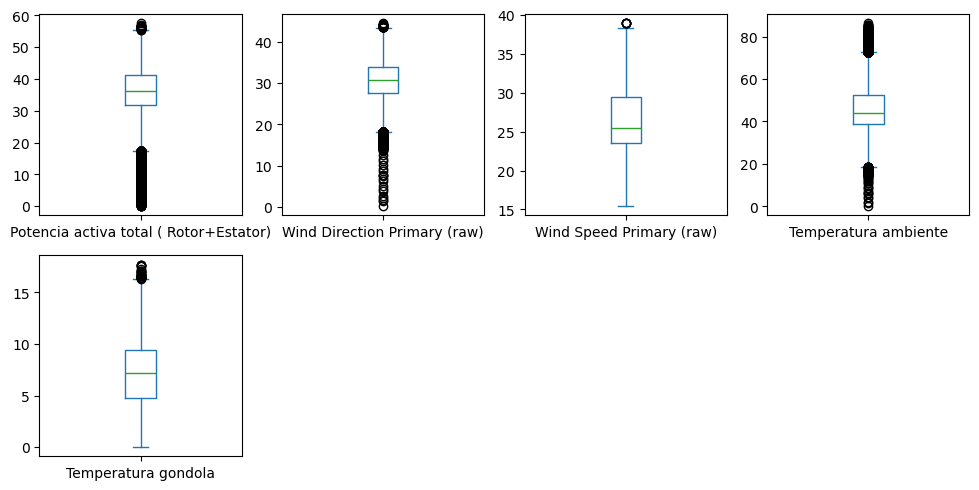

In [10]:
#Verifying input variables

df_filter = dataset_format[variables_input]

fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df_filter.plot(ax=ax, kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

plt.show()

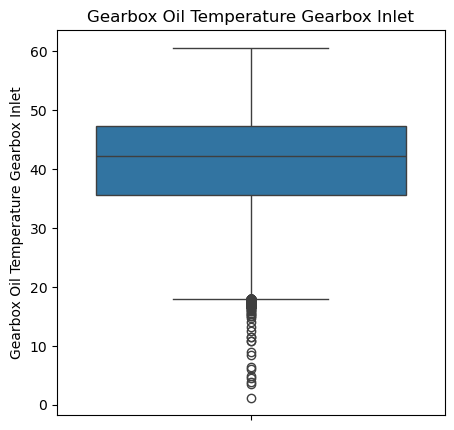

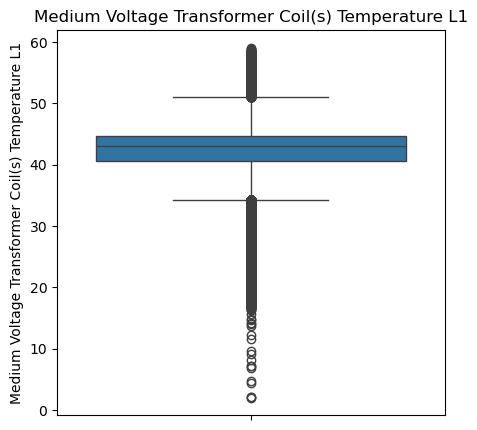

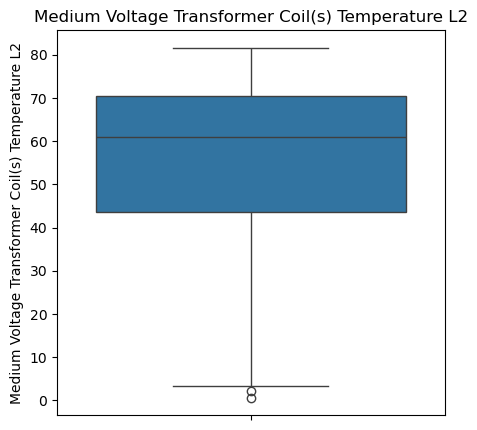

In [43]:
#Verifying and filtering output variables

for col in variables_output[:3]:
    df_filter_variable = dataset_format[variables_input + [col]].copy()

    df_filter_variable = df_filter_variable[(df_filter_variable[col] < 200)]
    df_filter_variable = df_filter_variable[(df_filter_variable[col] >= 0)]

    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df_filter_variable[col])
    plt.title(col)
    plt.show()


In [44]:
#Detecting null values

df_filter_variable.isnull().sum()

Potencia activa total ( Rotor+Estator)               0
Wind Direction Primary (raw)                         0
Wind Speed Primary (raw)                             0
Temperatura ambiente                                 0
Temperatura gondola                                  0
Medium Voltage Transformer Coil(s) Temperature L2    0
dtype: int64

In [45]:
#Detecting nan values
df_filter_variable.isna().sum()

Potencia activa total ( Rotor+Estator)               0
Wind Direction Primary (raw)                         0
Wind Speed Primary (raw)                             0
Temperatura ambiente                                 0
Temperatura gondola                                  0
Medium Voltage Transformer Coil(s) Temperature L2    0
dtype: int64

<a id="section5"></a>
# <font color="#004D7F"> 5. Selecting input variables</font>

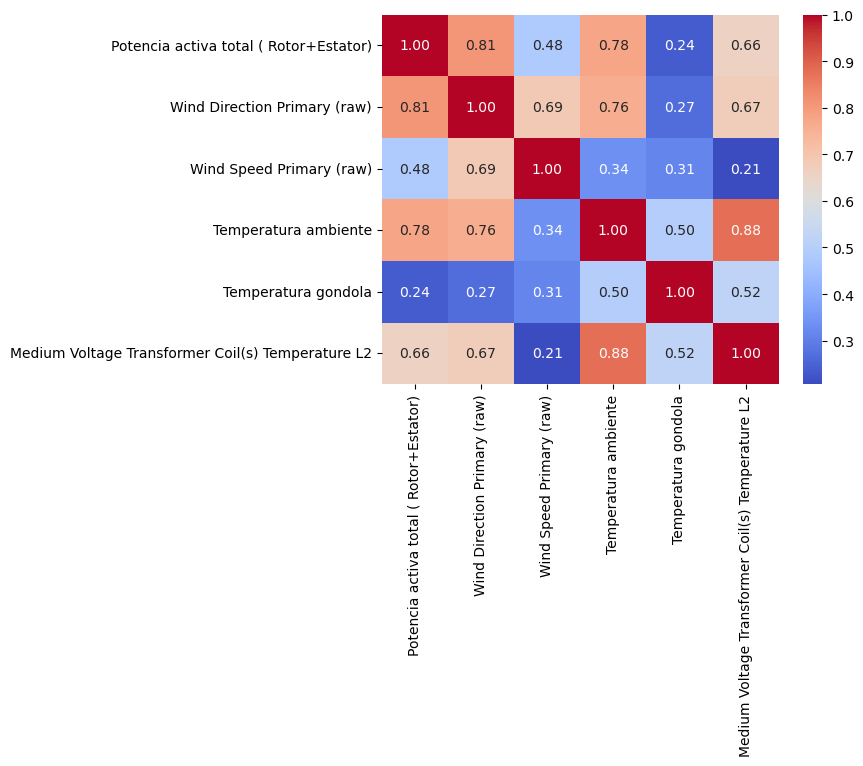

In [46]:
#Correlation to select input variables

pd.set_option('display.precision', 2)

corr = df_filter_variable.corr(method="pearson")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

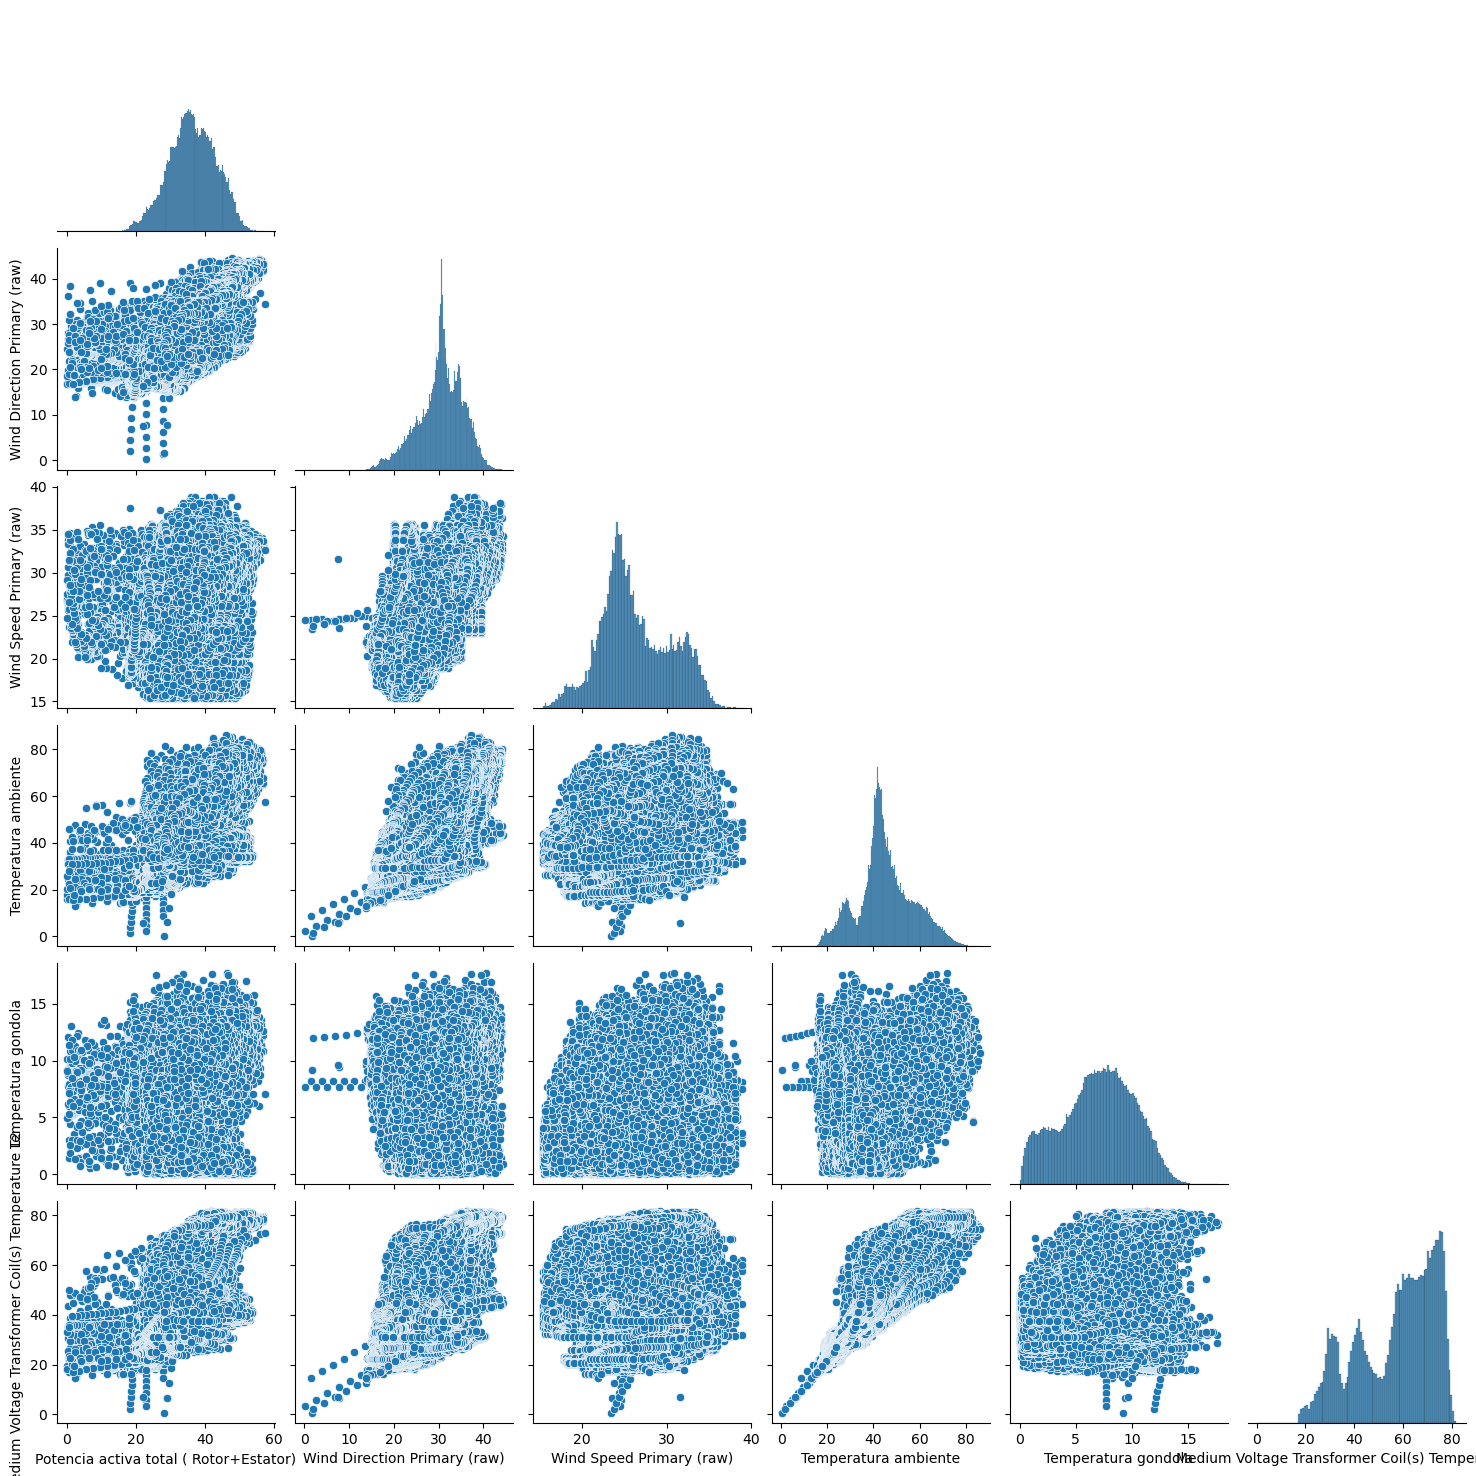

In [47]:
sns.pairplot(df_filter_variable, corner = True)

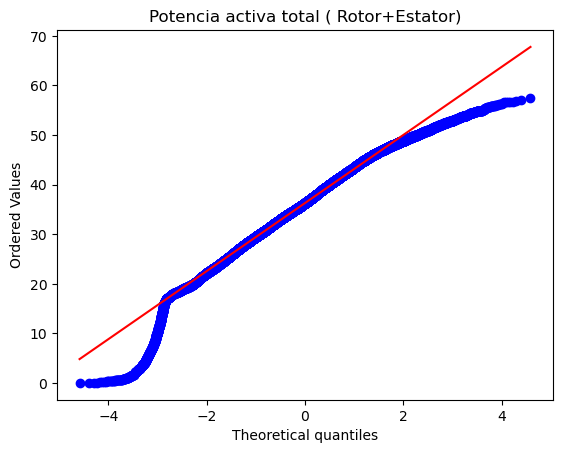

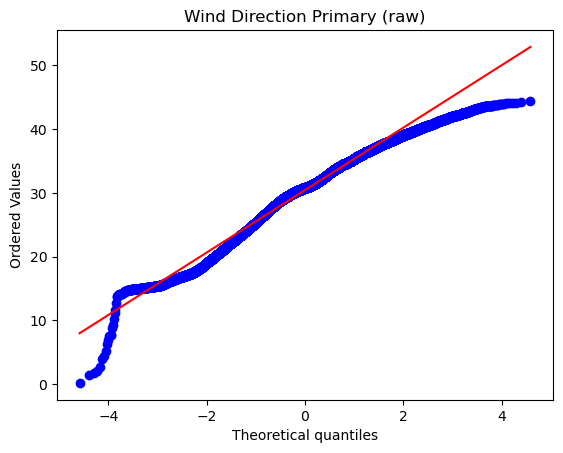

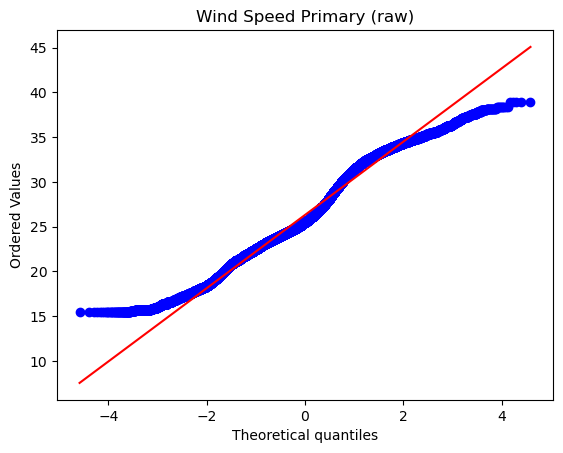

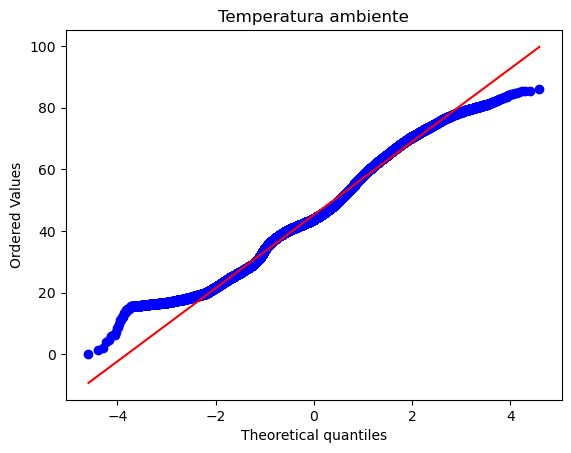

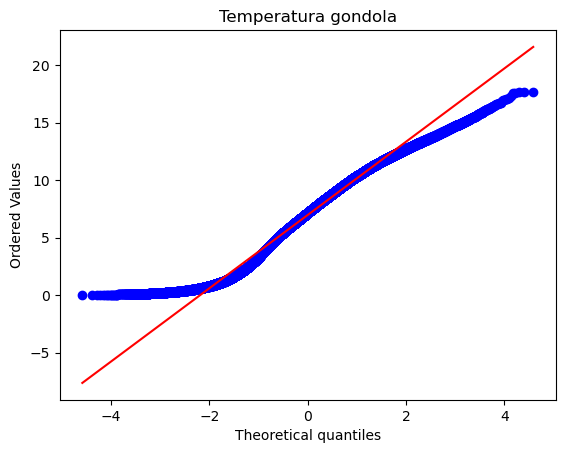

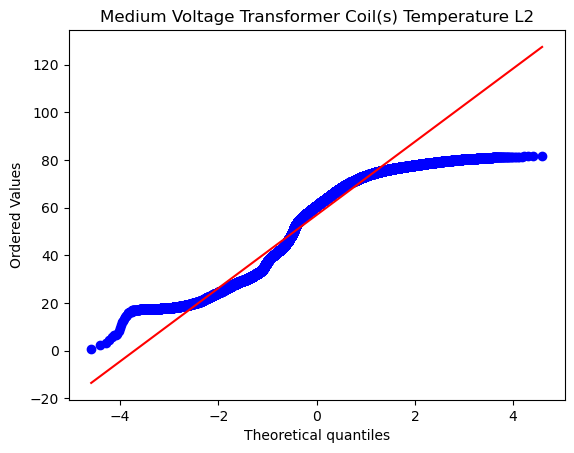

In [48]:
for col in df_filter_variable.select_dtypes(include="number").columns:
    data = df_filter_variable[col].dropna()
    if len(data) < 8:
        continue

    plt.figure()
    stats.probplot(data, plot=plt)
    plt.title(col)
    plt.show()


In [49]:
X = df_filter_variable.iloc[:,:-1].values
Y = df_filter_variable.iloc[:,-1].values

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
                                               test_size=0.2, random_state=7, shuffle=True)

<a id="section6"></a>
# <font color="#004D7F"> 6. Selecting model</font>

LiR: -6.653 (0.021)
LASSO: -6.727 (0.017)
EN: -6.728 (0.017)
k-NN: -2.916 (0.028)
CART: -4.004 (0.044)


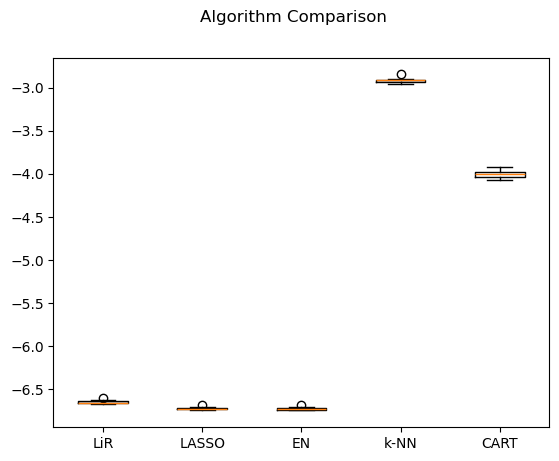

In [50]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_root_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LiR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('k-NN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVM', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a id="section7"></a>
# <font color="#004D7F"> 7. Training and saving model</font>

In [51]:
#GRIDSEARCH to select the best hyperparameters

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [3,5,7,9,11,15],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2],              # 1 = Manhattan, 2 = Euclidean
    'knn__leaf_size': [20,30,40]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Mejores parámetros:", grid_search.best_params_)
accuracy = grid_search.best_estimator_.score(X_validation, Y_validation)
print("Precisión en el conjunto de prueba:", accuracy)

Mejores parámetros: {'knn__leaf_size': 20, 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}
Precisión en el conjunto de prueba: 0.9635563948618477


In [ ]:
#PIPELINE

estimators = []
estimators.append(("regressor", KNeighborsRegressor(n_neighbors=3, weights='uniform', p=1, leaf_size=20)))
model_PIPELINE = Pipeline(estimators)

# Fit model
model_PIPELINE.fit(X_train, Y_train)

predictions = model_PIPELINE.predict(X_validation)

# Evaluar el modelo utilizando las predicciones en la escala original
mse = mean_squared_error(Y_validation, predictions)
mae = mean_absolute_error(Y_validation, predictions)

print(f"MSE: {mse}, MAE: {mae}")


MSE: 38.67048890181036, MAE: 3.72456041786088


In [29]:
# Guardar el pipeline completo
col_name = col.replace(" ","_")
joblib.dump(model_PIPELINE, f"../models/{col_name}.pkl")

['../models/Temperatura_rodamiento_trasero_eje_lento.pkl']

<a id="section8"></a>
# <font color="#004D7F"> 8. Using model</font>

In [ ]:
# Uploading model
modelo_uploaded = joblib.load(f"../models/{col_name}.pkl")

predictions = modelo_uploaded.predict(X_validation)

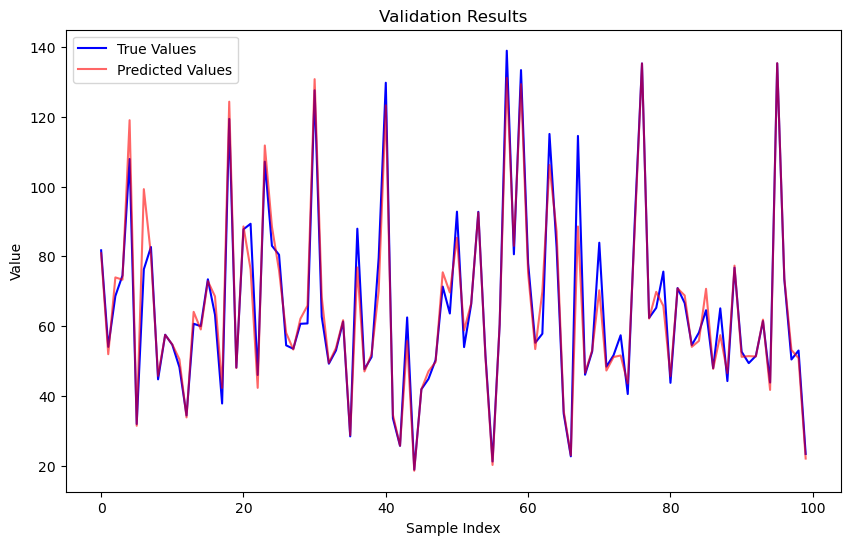

In [31]:
plt.figure(figsize=(10, 6))
    
y_true = Y_validation[-100:]
y_pred = predictions[-100:]

plt.plot(range(len(y_true)), y_true, color='blue', label='True Values')
plt.plot(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicted Values')
plt.title(f'Validation Results')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()